In [11]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from matplotlib import pyplot as plt
from matplotlib import cm

## 7.1

**Simulate a single predictor and a nonlinear relationship, such as a sin wave shown in Fig. 7.7, and investigate the relationship between the cost, \epsilon, and kernel parameters for a support vector machine model**

**(a) Fit different models using a radial basis function and different values of the cost (the C parameter) and $\epsilon$. Plot the fitted curve.**

**(b) How do the cost, $\epsilon$, and $\sigma$ values affect the model?**

No noticible changes to model when cost >1, however model fits noticibly less precisely when cost <1.

$\epsilon > 0.33$  degrade the performance. Possibly this is due to much fewer data points used as support veeectors.




In [3]:
np.random.seed(seed=12345)
x = [i/100 for i in range(200, 1000, 8)]

In [4]:
df = pd.DataFrame(x, columns=["x"])

In [5]:
df["y"] = np.sin(df["x"])
df["y"] = df["y"] + np.random.normal(0, 0.25, 100)

[]

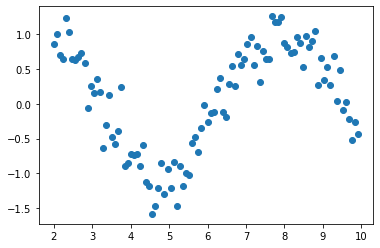

In [6]:
plt.scatter(x=df["x"], y=df["y"])
plt.plot()

In [7]:
cost=1
epsilon=0.1
rbfSVM = SVR(kernel="rbf", C=cost, epsilon=epsilon)

In [8]:
rbfSVM.fit(X=df[["x"]], y=df["y"])

SVR(C=1)

[]

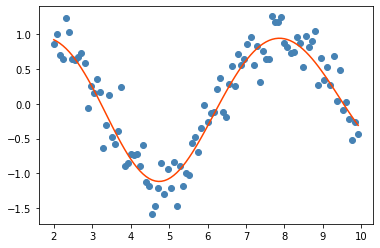

In [10]:
plt.plot(df["x"], rbfSVM.predict(df[["x"]]), color="orangered")
plt.scatter(x=df["x"], y=df["y"], color="steelblue")
plt.plot()

In [32]:
df["x"]

0     2.00
1     2.08
2     2.16
3     2.24
4     2.32
      ... 
95    9.60
96    9.68
97    9.76
98    9.84
99    9.92
Name: x, Length: 100, dtype: float64

In [41]:
# Varying the costs
epsilon = 0.1
costs = [10**i for i in np.linspace(-3,3,num=13)]
c_predictions = {}

In [42]:
for cost in costs:
    rbfSVM = SVR(kernel="rbf", C=cost, epsilon=epsilon)
    rbfSVM.fit(X=df[["x"]], y=df["y"])
    c_predictions[cost] = rbfSVM.predict(df[["x"]])

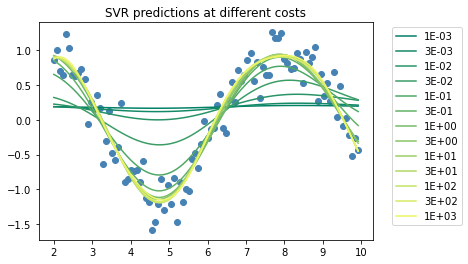

In [44]:
plt.scatter(x=df["x"], y=df["y"], color="steelblue")
for i, cost in enumerate(c_predictions):
    plt.plot(df["x"], c_predictions[cost], color=cm.summer(i/13))
plt.legend([f"{cost:.0E}" for cost in costs], loc="upper left", bbox_to_anchor=(1.04, 1))
plt.title("SVR predictions at different costs")
plt.show()

In [33]:
# Varying the epsilons
cost = 1
e_predictions = {}

In [38]:
for epsilon in np.geomspace(0.01,0.5,num=10):
    rbfSVM = SVR(kernel="rbf", C=cost, epsilon=epsilon)
    rbfSVM.fit(X=df[["x"]], y=df["y"])
    e_predictions[epsilon] = rbfSVM.predict(df[["x"]])

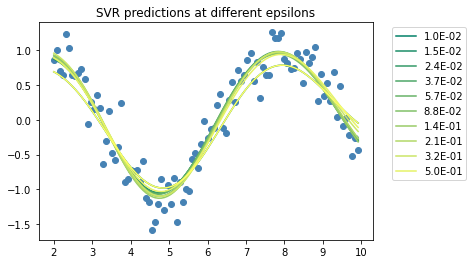

In [45]:
plt.scatter(x=df["x"], y=df["y"], color="steelblue")
for i, cost in enumerate(e_predictions):
    plt.plot(df["x"], e_predictions[cost], color=cm.summer(i/10))
plt.legend([f"{e:.1E}" for e in np.geomspace(0.01,0.5,num=10)], loc="upper left", bbox_to_anchor=(1.04, 1))
plt.title("SVR predictions at different epsilons")
plt.show()